<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-family:Arial;letter-spacing:0.5px">

<p width = 20%, style="padding: 10px;
              color:white;">
Feature Engineering: Scaling, Polynomials, and Interactions
              
</p>
</div>

Data Science Cohort Live NYC Feb 2022
<p>Phase 2: Topic 19</p>
<br>
<br>

<div align = "right">
<img src="Images/flatiron-school-logo.png" align = "right" width="200"/>
</div>
    
    

#### Feature Engineering: Transforming input data
- Categorical data to numeric form
- Input in form that the better conforms to structure of input-output relationship.
- Model interactions between features.

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import norm
noise = norm.rvs(scale = 16, size = 400)
x = np.linspace(-7,7, 400) + 300
y = 3*(x-300)**2  + 4*(x-300) + 100 + noise
tempyield_data = pd.DataFrame({'Temp': x, 'Yield': y})

- Target may not depend linearly on feature set.
- I.e. cant approximate well by a hyperplane.

In [55]:
%%capture yieldvtemp
sns.set_context('talk')
fig, ax = plt.subplots()
sns.scatterplot(y ='Yield', x = 'Temp', data = tempyield_data, ax = ax)
ax.set_title('Yield vs. Temperature')
plt.show()

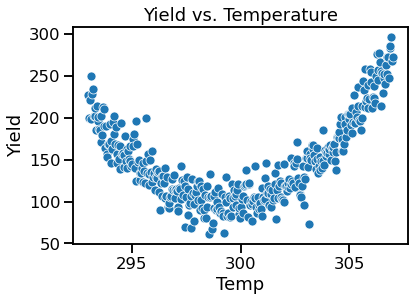

In [56]:
yieldvtemp()

Fitting yield to a model simply linear in temperature might be considered silly. 

What kind of dependence might we try?

In [57]:
tempyield_data.head()

,Temp,Yield
0,293.000000,227.035577
1,293.035088,199.681801
2,293.070175,220.776145
3,293.105263,198.905869
4,293.140351,249.612566


Perform a regression:
$$ Y = \beta_2T^2 + \beta_1T + \beta_0  $$

*Note*: this is still a model **linear** in coefficients. 

Construct another column that is $T^2$.

In [58]:
tempyield_data['Temp_squared'] = tempyield_data['Temp']**2
tempyield_data.head()

,Temp,Yield,Temp_squared
0,293.000000,227.035577,85849.000000
1,293.035088,199.681801,85869.562635
2,293.070175,220.776145,85890.127732
3,293.105263,198.905869,85910.695291
4,293.140351,249.612566,85931.265312


Linear regression of Yield on $T$ and $T^2$.

Doing a regression just on T. Silly but lets do it anyway to see:

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [105]:
X = tempyield_data['Temp']
y = tempyield_data['Yield']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

lr_simple = LinearRegression()
lr_simple.fit(X_train.values.reshape(-1,1), y_train)

LinearRegression()

In [106]:
print(lr_simple.coef_, lr_simple.intercept_)

[4.66455509] -1252.201908258662


In [107]:
lr_simple.score(X_train.values.reshape(-1,1),
                y_train)

0.14207099475500073

In [108]:
y_pred = lr_simple.predict(X_test.values.reshape(-1,1))
mean_absolute_error(y_pred, y_test)

40.26207624374614

But saying there is no relation between temperature and yield is obviously a mistake!

Regression on $T$ and $T^2$.

In [109]:
X_poly = tempyield_data[['Temp', 'Temp_squared']]
y = tempyield_data['Yield']

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.3)

lr_poly = LinearRegression()
lr_poly.fit(X_train, y_train)

LinearRegression()

In [110]:
print(lr_poly.coef_, lr_poly.intercept_)

[-1801.91971623     3.01035886] 269741.27745439083


In [111]:
lr_poly.score(X_train, y_train)

0.8854866201310034

In [112]:
y_pred_poly = lr_poly.predict(X_test)
mean_absolute_error(y_pred_poly, y_test)

13.194098725385322

Let's visualize the difference in predictions:

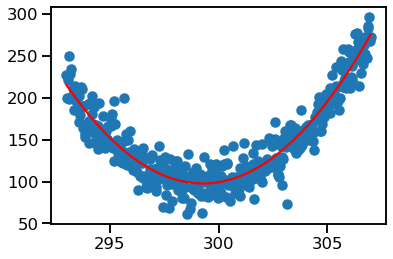

In [68]:
beta_1, beta_2 = lr_poly.coef_
beta_0 = lr_poly.intercept_

poly_pred = beta_2*X**2 + beta_1*X + beta_0

fig, ax = plt.subplots()
ax.plot(X, poly_pred, c ='r')
ax.scatter(X, y)
plt.show()

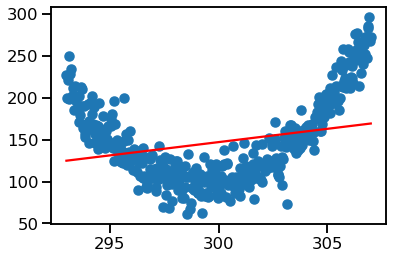

In [69]:
beta_1 = lr_simple.coef_[0]
beta_0 = lr_simple.intercept_

lin_pred = beta_1*X + beta_0

fig, ax = plt.subplots()
ax.plot(X, lin_pred, c ='r')
ax.scatter(X, y)
plt.show()

#### More generally

Target depend on feature with higher order polynomial. Procedure would be same.

$$ Y = \beta_0 + \beta_1 x + \beta_2 x^2 + ... + \beta_n x^n $$

Again:
- Construct feature columns for each power of x.
- Fit $\beta_i$ using linear regression.

#### Using scikit-learn: PolynomialFeatures with a single feature

- With single feature is easy/fast way to construct these features at higher power.
- Again, main advantage: can be used in a pipeline.

In [113]:
from sklearn.preprocessing import PolynomialFeatures

PolynomialFeatures()
- Takes arguments for highest order of polynomial
- Can chose to include zeroth power term for fitting bias (useful for statsmodels)

In [118]:
pf = PolynomialFeatures(degree = 3, include_bias = False)
X_to_second = pf.fit_transform(X.values.reshape(-1,1))
X_to_second[0:10]

array([[2.93000000e+02, 8.58490000e+04, 2.51537570e+07],
       [2.93035088e+02, 8.58695626e+04, 2.51627948e+07],
       [2.93070175e+02, 8.58901277e+04, 2.51718348e+07],
       [2.93105263e+02, 8.59106953e+04, 2.51808770e+07],
       [2.93140351e+02, 8.59312653e+04, 2.51899213e+07],
       [2.93175439e+02, 8.59518378e+04, 2.51989677e+07],
       [2.93210526e+02, 8.59724127e+04, 2.52080164e+07],
       [2.93245614e+02, 8.59929902e+04, 2.52170672e+07],
       [2.93280702e+02, 8.60135700e+04, 2.52261202e+07],
       [2.93315789e+02, 8.60341524e+04, 2.52351753e+07]])

And fitting is exactly the same as before.

#### PolynomialFeatures() with multiple features.

In [119]:
sales_df = pd.read_csv('Data/advertising.csv').drop(columns = ['Unnamed: 0'])
sales_df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [120]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


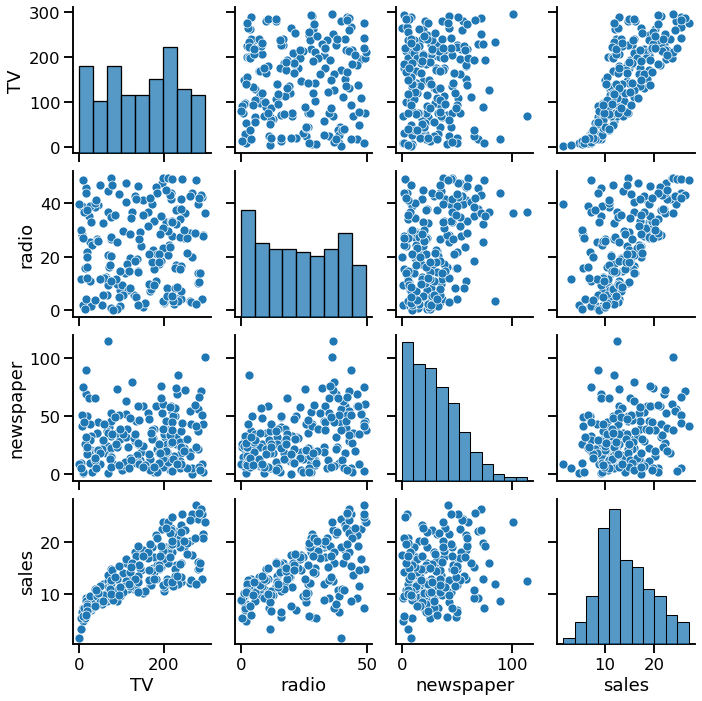

In [121]:
ax = sns.pairplot(sales_df)

<AxesSubplot:>

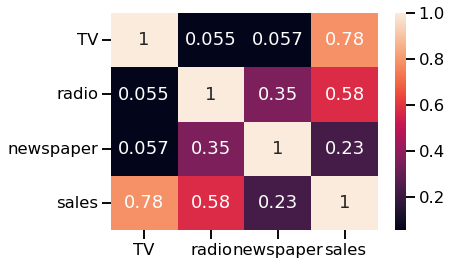

In [122]:
sns.heatmap(sales_df.corr(), annot = True)

Maybe want to model interactions

Recall that $$ Cov(Radio, TV) \rightarrow Radio\times TV $$

Average of product encodes correlation between the two.

Using products of features as new features:

- Factors pairwise correlations of original features into prediction.

Model with linear terms and interactions:
$$ Sales = \beta_{TV} TV + \beta_{Radio} Radio + \beta_{Newspaper} Newspaper + \\ \beta^{int}_1 \Big( TV \times Radio \Big) + \beta^{int}_2 \Big( TV \times Newspaper \Big) + \beta^{int}_3 \Big(Radio \times Newspaper\Big) + \beta_0 $$

vs. model with just linear terms

$$ Sales = \beta_{TV} TV + \beta_{Radio} Radio + \beta_{Newspaper} Newspaper + \beta_0 $$

In [123]:
X = sales_df[['TV', 'radio', 'newspaper']]
y = sales_df['sales']

First conduct linear regression on the raw features:
- train test split
- then perform standardization

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

We could apply pandas .apply():
- very inconvenient when doing train test splits
- fitting parameters on train set
- applying trasformation based on those parameters to:
    - train
    - test

Scikit-learn has transformer object that standardizes columns:
- just for this purpose on train/test

In [125]:
from sklearn.preprocessing import StandardScaler

In [126]:
ss = StandardScaler()

Now extract means and standard deviations for each column:
- .fit() method
Then apply transformartion to both train and test:
- .transform() method
    

In [127]:
ss.fit(X_train)
X_standardized_train = ss.transform(X_train)
X_standardized_test = ss.transform(X_test)

In [81]:
X_standardized_train.mean(axis = 0)

array([-4.4408921e-17,  2.6328146e-16,  1.4274296e-16])

In [82]:
X_standardized_train.std(axis = 0)

array([1., 1., 1.])

In [83]:
X_standardized_test.mean(axis = 0)

array([ 0.08755478, -0.01559748,  0.09893816])

In [84]:
X_standardized_test.std(axis = 0)

array([0.88022453, 1.08959514, 1.00073216])

Now define and fit the model on the train set using the standardized training features:
- get $R^2$

In [85]:
lr_raw = LinearRegression()
lr_raw.fit(X_standardized_train, y_train)
lr_raw.score(X_standardized_train, y_train)

0.8947238352917999

In [86]:
pd.Series(lr_raw.coef_,
          index = X.columns) 

TV           4.134315
radio        2.692871
newspaper   -0.045282
dtype: float64

This jives with our expectations from EDA.

Evaluating on the test set:

In [87]:
y_pred = lr_raw.predict(X_standardized_test)
mean_absolute_error(y_pred, y_test)

1.1244298984125984

Can we do better with Polynomial Features?
- Let's include the interaction terms!

PolynomialFeatures:
- has argument interaction_only = True/False.
- If true only takes interactions terms at highest order specified.

In [131]:
linear_withinteraction = PolynomialFeatures(degree = 2, interaction_only = True, include_bias = False)

We've already made the train/test split:
- X_train, X_test, y_train, y_test

Fit PolynomialFeatures to train set, then transform both sets

In [132]:
linear_withinteraction.fit(X_train)
feat_names = pd.Series(linear_withinteraction.get_feature_names())
feat_names

0       x0
1       x1
2       x2
3    x0 x1
4    x0 x2
5    x1 x2
dtype: object

In [133]:
Xpolytrans_train = linear_withinteraction.transform(X_train)
Xpolytrans_test = linear_withinteraction.transform(X_test)

After pandafying our numpy array for train set:

In [134]:
map_dict = {'x0': 'TV', 'x1': 'Radio', 'x2': 'Newspaper'}
for key, value in map_dict.items():
    feat_names = feat_names.str.replace(key, value)
X_trans_df = pd.DataFrame(Xpolytrans_train ,columns = feat_names)

In [135]:
X_trans_df.head()

,TV,Radio,Newspaper,TV Radio,TV Newspaper,Radio Newspaper
0,134.3,4.9,9.3,658.07,1248.99,45.57
1,276.7,2.3,23.7,636.41,6557.79,54.51
2,280.7,13.9,37.0,3901.73,10385.90,514.30
3,265.6,20.0,0.3,5312.00,79.68,6.00
4,234.5,3.4,84.8,797.30,19885.60,288.32


Looks good. Let's standardize the variables and analyze the weights of the factors and their interactions.
- Again: apply the standardscaler to the train set with interaction and transform test

In [136]:
# standardizes each column in feature matrix. Scikit-learn has a transformer for this.
from sklearn.preprocessing import StandardScaler
ss = StandardScaler() # object with does the standardization
X_trans_train = ss.fit_transform(Xpolytrans_train) # fit and transforms new polynomial feature matrix
X_trans_test = ss.transform(Xpolytrans_test) # uses fit parameters from train set to standardize test set as well

Getting $R^2$ and coefficients for our standardized linear model with interactions:

In [137]:
lr_poly_scaled = LinearRegression()
lr_poly_scaled.fit(X_trans_train, y_train)

# gets R^2 value for train set
lr_poly_scaled.score(X_trans_train, y_train)

0.9815699567116081

In [95]:
pd.Series(lr_poly_scaled.coef_,
          index = X_trans_df.columns)

TV                 1.826793
Radio              0.147106
Newspaper          0.334739
TV Radio           4.107958
TV Newspaper      -0.437704
Radio Newspaper   -0.058192
dtype: float64

In [138]:
y_pred_interactions = lr_poly_scaled.predict(X_trans_test)
y_pred_interactions

array([11.44492465,  9.78623539, 11.07512773, 13.75601376, 12.09136917,
        9.83340745,  8.21915219, 15.3914625 , 13.24057406, 22.54589974,
       17.6720527 , 17.31508619, 12.04145308, 14.29551443,  8.43934867,
       24.69306856, 11.67460178,  7.2556202 ,  9.82620689, 22.14999246,
       15.38922943,  7.99270094, 20.8857845 , 12.6695446 ,  9.21751042,
        9.50136878, 10.08914735, 28.15652187,  8.23786229, 11.85968018,
       12.59972234, 15.10744283, 14.45495032,  8.28031128,  7.51709664,
       13.90267746, 16.92938644,  8.0979772 ,  9.9665224 , 25.01430681,
       12.77014407, 14.83024248,  8.70678647, 18.0643369 ,  7.1067105 ,
       15.08943636, 10.69568386, 20.63735604, 18.11282387, 10.88688729,
        9.40769854,  9.72228705,  8.7579724 , 10.22197284, 26.0457786 ,
       15.39355242, 13.51915569, 17.03588959, 11.32235646, 13.03344212])

A comparison on test error with a mode linear in the features vs including interaction terms:

In [139]:
mean_absolute_error(y_pred_interactions, y_test)

0.841367071022852

The old model:

In [98]:
mean_absolute_error(y_pred, y_test)

1.1244298984125984

Some words of advice:
- Adding interactions and higher order terms can be useful.
- But they can also add extra variables that can lead to overfitting or useless parameters.
- Be careful and use your judgment.

#### Also: interaction terms not always interpretable. But may lead to better predictions.

Takeaway:
- This is where EDA is really important:
    - Visualization
    - Descriptive statistics 
    - Correlation matrices
    - Playing with your data!
    
See what transformations and functional relations useful for model inference and prediction.